#  _CREDIT EDA CASE STUDY_

## Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

## 1.Importing the Libraries

In [1]:
#Ignoring filterwarnings
import warnings

warnings.filterwarnings('ignore')

In [2]:
#Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#To view large outputs
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## 2. Check the structure of data

### 2.1. Reading the Files

In [4]:

A_D = pd.read_csv('application_data.csv')
P_A=pd.read_csv('previous_application.csv')

### 2.2. Examining application data

In [5]:
#Checking the shape of the data
A_D.shape

(307511, 122)

In [6]:
# Check the column-wise info of the dataframe
A_D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
#Check the summary for the numeric columns 
A_D.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [8]:
#Check the first five entries of the data
A_D.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### 2.2. Examining previous application data

In [9]:
#Checking the shape of the data
P_A.shape

(1670214, 37)

In [10]:
# Check the column-wise info of the dataframe
P_A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [11]:
#Check the summary for the numeric columns 
P_A.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [12]:
#Check the first five entries of the data
P_A.head(5)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Data quality check and Missing Values

### 3.1 Checking missing values in Application data 

In [13]:
#Checking missing values in Application data
null_1=(100*A_D.isnull().sum()/len(A_D)).round(2)
null_1

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [14]:
null_1.describe()

count    122.000000
mean      24.395902
std       28.446741
min        0.000000
25%        0.000000
50%        0.330000
75%       50.817500
max       69.870000
dtype: float64

### 3.2 Cleaning in Application data 

In [15]:
#Cleaning the rows which have null value percentage Standard Deviation 
A_D=A_D.loc[:, null_1<=29]

In [16]:
#Checking null value percent for the cleaned data
(100*A_D.isnull().sum()/len(A_D)).round(2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
C

In [17]:
#Shape after cleaning
A_D.shape

(307511, 72)

### 3.3 Checking missing values in Previous Application data 

In [18]:
#Checking the missing values in previous application data.
null_2=(100*P_A.isnull().sum()/len(P_A)).round(2)
null_2

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [19]:
null_2.describe()

count    37.000000
mean     17.977297
std      27.556341
min       0.000000
25%       0.000000
50%       0.000000
75%      40.300000
max      99.640000
dtype: float64

### 3.4 Cleaning in Previous Application data 

In [20]:
#Cleaning the rows which have null value percentage Standard Deviation 
P_A=P_A.loc[:, null_2<=28]

In [21]:
#Checking null value percent for the cleaned data
(100*P_A.isnull().sum()/len(P_A)).round(2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
dtype: float64

In [22]:
#Shape after cleaning
P_A.shape

(1670214, 26)

## 4.Checking the data-types of the columns in Application Data

In [23]:
A_D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [24]:
# Converting the data types of some of the columns that shouldn't be float data-type.
A_D['DAYS_REGISTRATION'] = A_D['DAYS_REGISTRATION'].astype(int,errors='ignore')
A_D['CNT_FAM_MEMBERS'] = A_D['CNT_FAM_MEMBERS'].astype(int,errors='ignore')
A_D['OBS_30_CNT_SOCIAL_CIRCLE'] = A_D['OBS_30_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')
A_D['DEF_30_CNT_SOCIAL_CIRCLE'] = A_D['DEF_30_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')
A_D['OBS_60_CNT_SOCIAL_CIRCLE'] = A_D['OBS_60_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')
A_D['DEF_60_CNT_SOCIAL_CIRCLE'] = A_D['DEF_60_CNT_SOCIAL_CIRCLE'].astype(int,errors='ignore')
A_D['AMT_REQ_CREDIT_BUREAU_HOUR'] = A_D['AMT_REQ_CREDIT_BUREAU_HOUR'].astype(int,errors='ignore')
A_D['AMT_REQ_CREDIT_BUREAU_DAY'] = A_D['AMT_REQ_CREDIT_BUREAU_DAY'].astype(int,errors='ignore')
A_D['AMT_REQ_CREDIT_BUREAU_WEEK'] = A_D['AMT_REQ_CREDIT_BUREAU_WEEK'].astype(int,errors='ignore')
A_D['AMT_REQ_CREDIT_BUREAU_MON'] = A_D['AMT_REQ_CREDIT_BUREAU_MON'].astype(int,errors='ignore')
A_D['AMT_REQ_CREDIT_BUREAU_QRT'] = A_D['AMT_REQ_CREDIT_BUREAU_QRT'].astype(int,errors='ignore')
A_D['AMT_REQ_CREDIT_BUREAU_YEAR'] = A_D['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(int,errors='ignore')

## 5.Removing the unwanted columns from the application_dataset

In [25]:
# We will remove the unwanted columns from the application_dataset

unwanted = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

A_D.drop(labels=unwanted, axis=1, inplace=True)

## 6.Checking the Gender and Organization column for any error

In [26]:
# Checking the Gender column first,

A_D.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [27]:
# Replacing the 'XNA' values with the Females as majority is Females & it won't affect our analysis

A_D.CODE_GENDER.replace(to_replace = 'XNA', value = 'F', inplace = True)

In [28]:
# Confirmation of changes in the Gender column
A_D.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [29]:
# Checking the Organization column second,

A_D.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

## 7.Creating bins for the 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [30]:
# Creating bins for the Income column i.e. "AMT_INCOME_TOTAL"

bins_income = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]

slot_income = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

A_D['AMT_INCOME_RANGE'] = pd.cut(A_D['AMT_INCOME_TOTAL'], bins_income, labels=slot_income)

In [31]:
# Creating bins for the Credit column i.e. "AMT_CREDIT"

bins_credit = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]

slots_credit = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

A_D['AMT_CREDIT_RANGE']=pd.cut(A_D['AMT_CREDIT'], bins_credit, labels=slots_credit)

## 8.Checking for the Imbalance Ratio

In [32]:
# Have a look into the TARGET data,

A_D.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

##### Here, 'Target = 0' means the people those who are non-defaulters.
##### And, 'Target=1' means the people those who are defaulters.

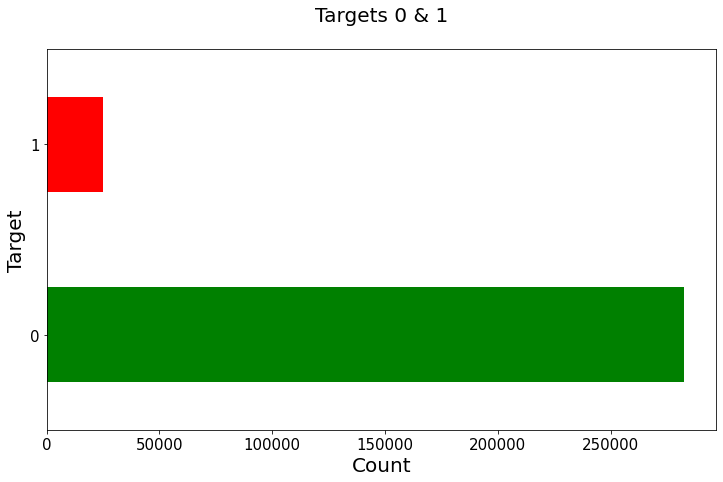

In [33]:
# Plotting for the Targets,

plt.figure(figsize=[12,7])

A_D.TARGET.value_counts().plot.barh(color=['Green','Red'])

plt.title('Targets 0 & 1\n', fontsize=20)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Target', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In [34]:
# Checking the imbalance ratio for the Target column

target_0 = A_D.loc[A_D["TARGET"]==0]
target_1 = A_D.loc[A_D["TARGET"]==1]

round(len(target_0)/len(target_1),2)

11.39

## 10.Univariate Analysis

### Plotting a bar chart for those having no difficulties in re-paying the loan i.e. the Target = 0 people.

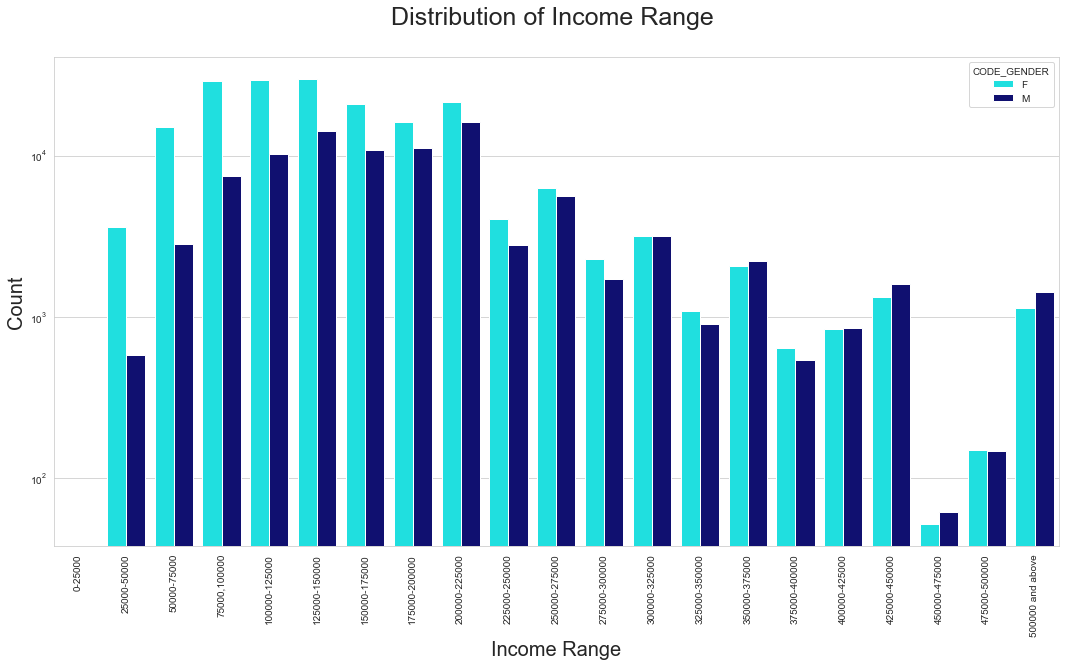

In [35]:
# Plotting for Income Range across various Gender.

plt.figure(figsize=[18,9])
sns.set_style('whitegrid')

sns.countplot(data=target_0, x='AMT_INCOME_RANGE', hue='CODE_GENDER', palette=['cyan','navy'])

plt.xticks(rotation=90)
plt.title('Distribution of Income Range \n', fontsize=25)
plt.xlabel('Income Range', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.yscale('log')

plt.show()

##### Conclusion from the graph:

> 1. Income range from 125000 to 150000 is having more number of credits. <br>
> 2. Very less count from range 450000-475000. <br>
> 3. It seems that the females are more than male in having credit. <br> 

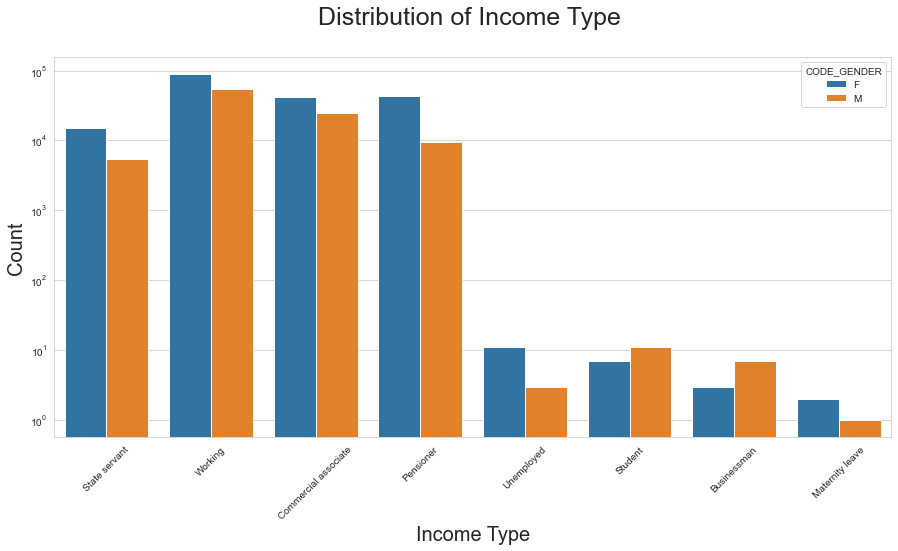

In [36]:
# Plotting for the various Income types across various Gender.

plt.figure(figsize=[15,7])
sns.set_style('whitegrid')

sns.countplot(data=target_0, x='NAME_INCOME_TYPE', hue='CODE_GENDER')

plt.xticks(rotation=45)
plt.title('Distribution of Income Type \n', fontsize=25)
plt.xlabel('Income Type', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.yscale('log')

plt.show()

##### Conclusion from the graph:

> 1. It seems that working women have most credit than others. <br>
> 2. It seems that 'State Servant','Working' and 'Commercial Associate'have more credit counts compared to others. <br>
> 3. It seems Women in 'Maternity leave' has less credit in comparison to others. <br> 

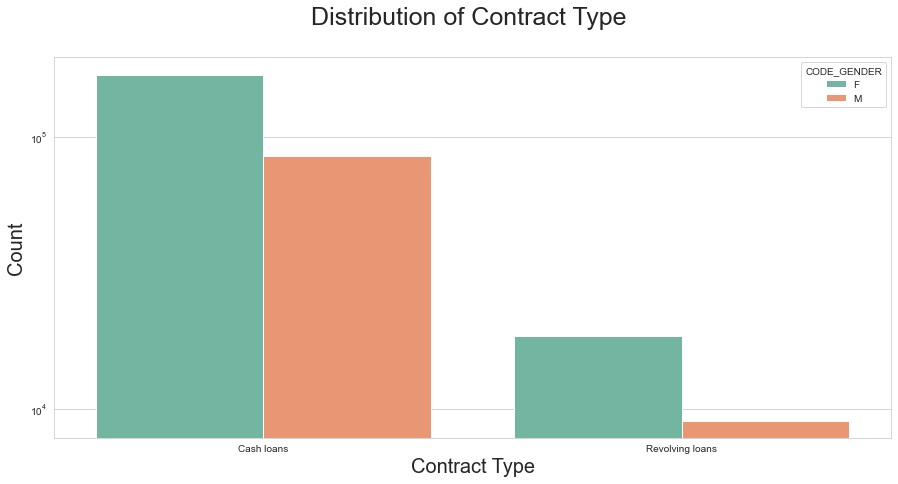

In [37]:
# Plotting for the Contract type across various Genders.

plt.figure(figsize=[15,7])
sns.set_style('whitegrid')

sns.countplot(data=target_0, x='NAME_CONTRACT_TYPE', hue='CODE_GENDER', palette='Set2')

plt.xticks
plt.title('Distribution of Contract Type \n', fontsize=25)
plt.xlabel('Contract Type', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.yscale('log')

plt.show()

##### Conclusion from the graph:

> 1. It seems that cash loans’ is having higher number of credits than ‘Revolving loans’ contract type. <br>
> 2. Also, female applies more for Credit.


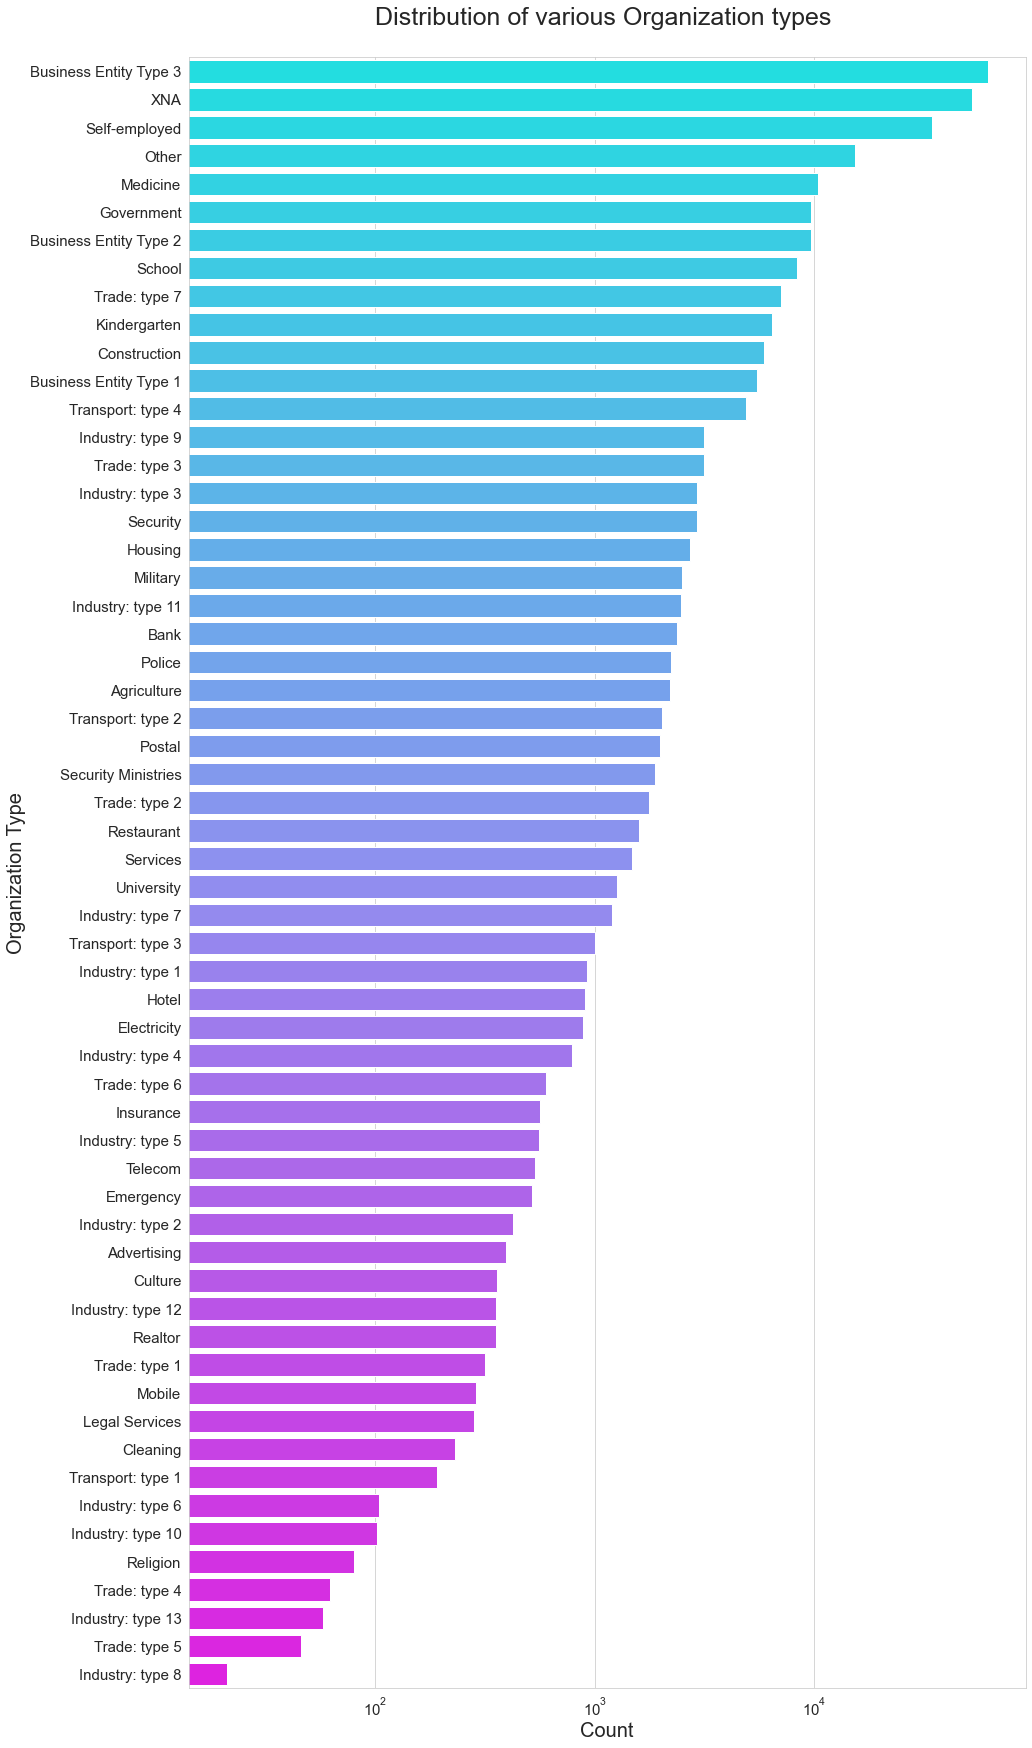

In [38]:
# Plotting for the various Organization Types

plt.figure(figsize=[15, 30])

sns.countplot(data=target_0, y='ORGANIZATION_TYPE', order=target_0['ORGANIZATION_TYPE'].value_counts().index, palette='cool')

plt.title("Distribution of various Organization types \n", fontsize=25)
plt.xticks( fontsize=15)
plt.yticks(fontsize=15)
plt.xscale('log')
plt.xlabel('Count', fontsize=20)
plt.ylabel('Organization Type', fontsize=20)

plt.show()

##### Conclusions from the graph:

> 1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ and ‘Government’. <br>
> 2. Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.

### Plotting for those having difficulty in re-paying the loan i.e. Target = 1 people. 

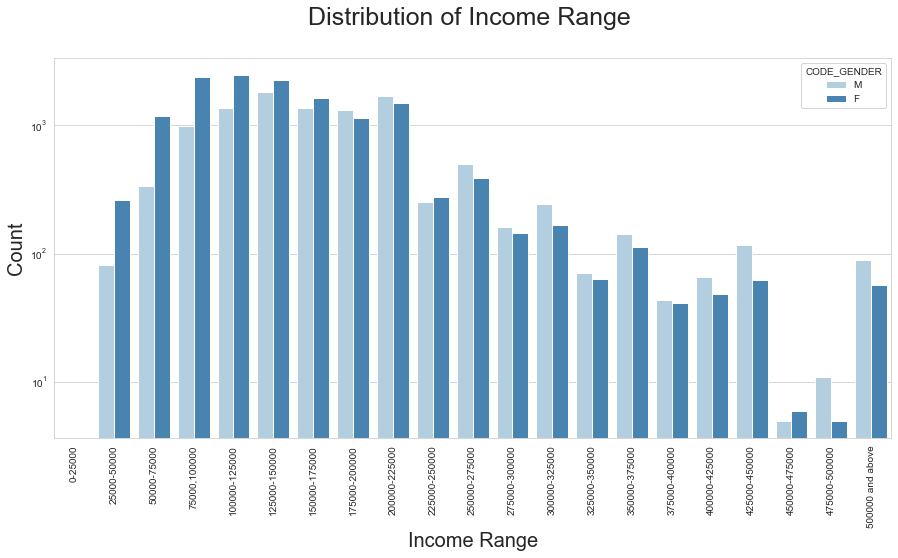

In [39]:
# Plotting for Income Range across various Gender.

plt.figure(figsize=[15,7])
sns.set_style('whitegrid')

sns.countplot(data=target_1, x='AMT_INCOME_RANGE', hue='CODE_GENDER', palette='Blues')

plt.xticks(rotation=90)
plt.title('Distribution of Income Range \n', fontsize=25)
plt.xlabel('Income Range', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.yscale('log')

plt.show()

##### Conclusions from the graph:

> 1. Male Counts are higher. <br>
> 2. Income range from 100000 to 200000 is having more number of credits. <br>
> 3. Less count for income range 450000-475000.

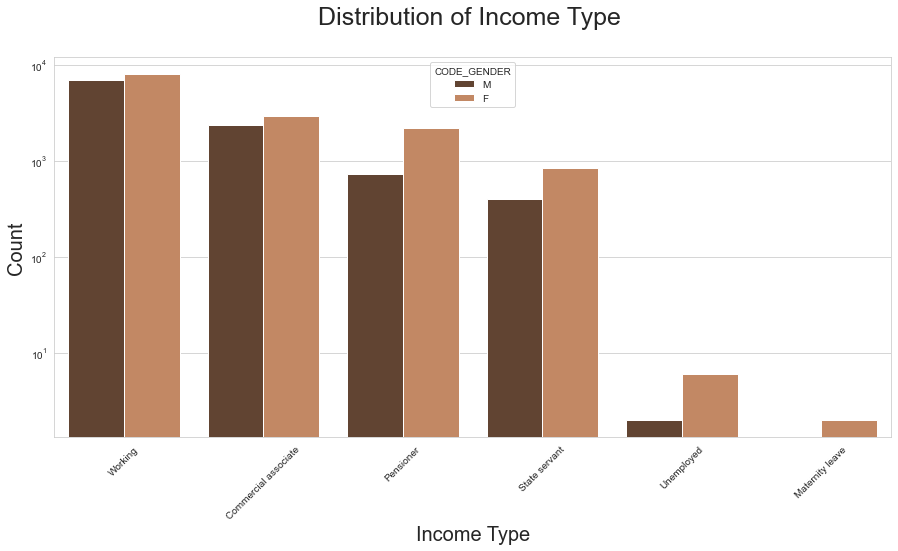

In [40]:
# Plotting for the various Income types across various Gender.

plt.figure(figsize=[15,7])
sns.set_style('whitegrid')

sns.countplot(data=target_1, x='NAME_INCOME_TYPE', hue='CODE_GENDER', palette='copper')

plt.xticks(rotation=45)
plt.title('Distribution of Income Type \n', fontsize=25)
plt.xlabel('Income Type', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.yscale('log')

plt.show()

##### Conclusions from the graph:

> 1. For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than other i.e. ‘Maternity leave. <br>
> 2. For this Females are having more number of credits than male. <br>
> 3. Less number of credits for income type ‘Maternity leave’.


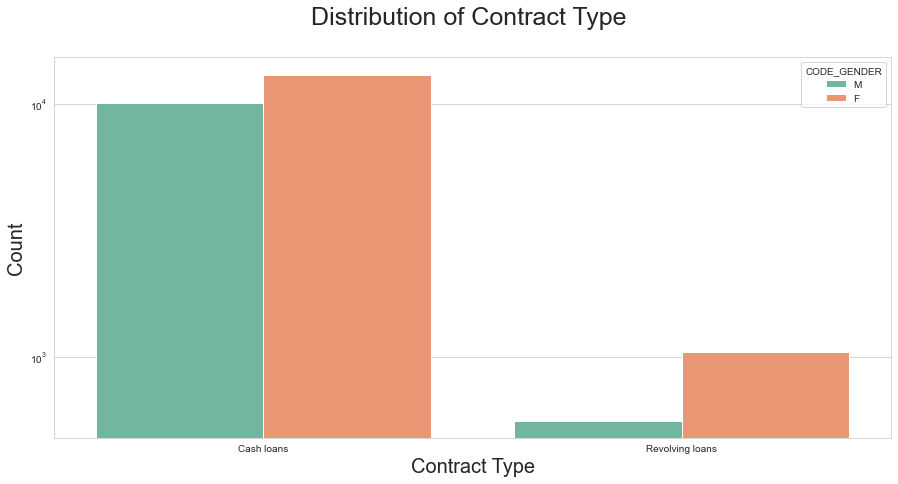

In [41]:
# Plotting for the Contract type across various Genders.

plt.figure(figsize=[15,7])
sns.set_style('whitegrid')

sns.countplot(data=target_1, x='NAME_CONTRACT_TYPE', hue='CODE_GENDER', palette='Set2')


plt.title('Distribution of Contract Type \n', fontsize=25)
plt.xlabel('Contract Type', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.yscale('log')

plt.show()

##### Conclusions from the graph:

> 1. For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type. <br>
> 2. For this also Female is leading for applying credits.

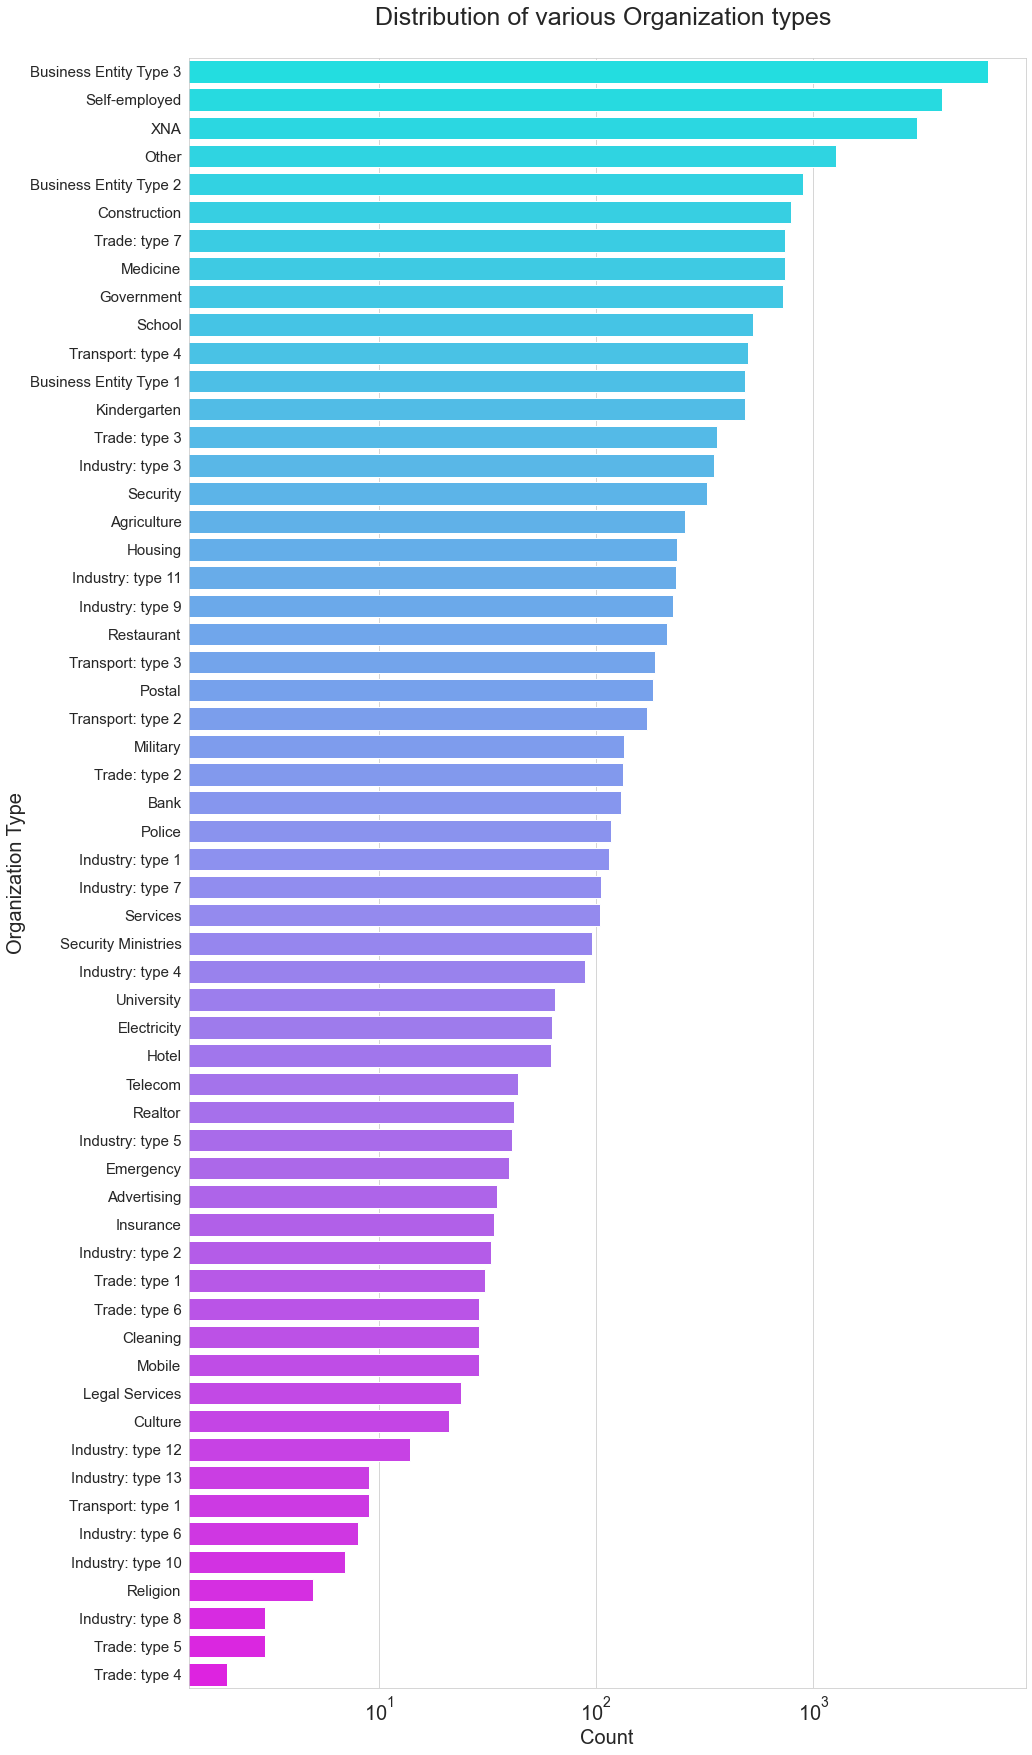

In [42]:
# Plotting for the various Organization Types

plt.figure(figsize=[15, 30])

sns.countplot(data=target_1, y='ORGANIZATION_TYPE', order=target_1['ORGANIZATION_TYPE'].value_counts().index, palette='cool')

plt.title("Distribution of various Organization types \n", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=15)
plt.xscale('log')
plt.xlabel('Count', fontsize=20)
plt.ylabel('Organization Type', fontsize=20)

plt.show()

##### Conclusions from the graph:

> 1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’. <br>
> 2. Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4. <br>
> 3. Same as type 0 in distribution of organization type.

## Defining the Correlation

In [43]:
# Calculating the correlation among the target_0 people

target_0_corr = target_0.iloc[0:, 2:].corr()
target_0_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.027397,0.003081,0.020905,-0.000525,-0.024363,0.336966,-0.243356,0.185792,-0.028751,0.878571,-0.005244,-0.012342,0.010857,0.017326,0.021587,0.072193,0.070988,-0.015455,-0.041729,0.014471,-0.002246,0.014137,-0.002172,-0.000432,0.000648,-0.001632,-0.010455,-0.007087,-0.042547
AMT_INCOME_TOTAL,0.027397,1.000000,0.342799,0.418953,0.349462,0.167851,0.062609,-0.141250,0.064937,0.022896,0.034256,0.076743,0.068510,0.137174,0.127701,0.010567,0.017618,0.020684,0.139598,-0.072401,-0.027828,-0.027621,-0.027690,-0.027593,0.001417,0.007862,0.006234,0.061470,0.013128,0.029536
AMT_CREDIT,0.003081,0.342799,1.000000,0.771309,0.987250,0.100604,-0.047378,-0.072515,0.013477,-0.001464,0.064536,0.053619,0.024617,0.053735,0.054250,-0.025036,-0.015703,0.002506,0.129140,0.036085,-0.000914,-0.019851,-0.000892,-0.022225,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.048866
AMT_ANNUITY,0.020905,0.418953,0.771309,1.000000,0.776686,0.120988,0.012263,-0.106425,0.039436,0.014113,0.075787,0.053589,0.041992,0.080665,0.075487,-0.005675,0.001520,0.010582,0.126615,0.028051,-0.013091,-0.022535,-0.012893,-0.023385,0.003148,0.002392,0.012681,0.038181,0.011248,-0.010882
AMT_GOODS_PRICE,-0.000525,0.349462,0.987250,0.776686,1.000000,0.103827,-0.044565,-0.071051,0.015916,-0.003649,0.062814,0.062766,0.026731,0.054922,0.054414,-0.024878,-0.016744,0.001310,0.135694,0.038908,-0.000707,-0.021025,-0.000723,-0.023171,-0.003116,0.004820,-0.001597,0.055850,0.018163,-0.051266
REGION_POPULATION_RELATIVE,-0.024363,0.167851,0.100604,0.120988,0.103827,1.000000,-0.025244,-0.006961,-0.052083,-0.001071,-0.023425,0.172814,0.004306,0.060086,0.083965,-0.048217,-0.041516,-0.013502,0.198493,-0.012486,-0.012107,0.005941,-0.011591,0.002255,-0.002265,0.001969,-0.002480,0.078629,-0.001013,0.001775
DAYS_BIRTH,0.336966,0.062609,-0.047378,0.012263,-0.044565,-0.025244,1.000000,-0.618048,0.333151,0.271314,0.285825,0.095916,0.066252,0.097908,0.071648,0.179772,0.241904,0.160072,-0.078158,-0.197287,0.007726,-0.003057,0.007316,-0.000990,0.004461,0.002772,-0.001069,0.002855,-0.011335,-0.072886
DAYS_EMPLOYED,-0.243356,-0.141250,-0.072515,-0.106425,-0.071051,-0.006961,-0.618048,1.000000,-0.210187,-0.274290,-0.237413,-0.094844,-0.035854,-0.108539,-0.097022,-0.089586,-0.254453,-0.219190,-0.030732,0.108585,0.007252,0.019579,0.007431,0.016635,-0.004497,-0.000802,0.002304,-0.035564,0.015288,0.052148
DAYS_REGISTRATION,0.185792,0.064937,0.013477,0.039436,0.015916,-0.052083,0.333151,-0.210187,1.000000,0.100236,0.175630,-0.008044,0.028700,0.037870,0.028475,0.064216,0.098919,0.072248,-0.052503,-0.103476,0.008315,0.001213,0.008247,0.002652,-0.002730,-0.000035,-0.001431,-0.011857,-0.000527,-0.026639
DAYS_ID_PUBLISH,-0.028751,0.022896,-0.001464,0.014113,-0.003649,-0.001071,0.271314,-0.274290,0.100236,1.000000,-0.020460,0.033980,0.034692,0.049161,0.035069,0.075096,0.099628,0.062259,-0.041703,-0.124715,-0.012326,0.000403,-0.012810,0.002491,0.004797,-0.000198,-0.001655,-0.008728,-0.007071,-0.035639


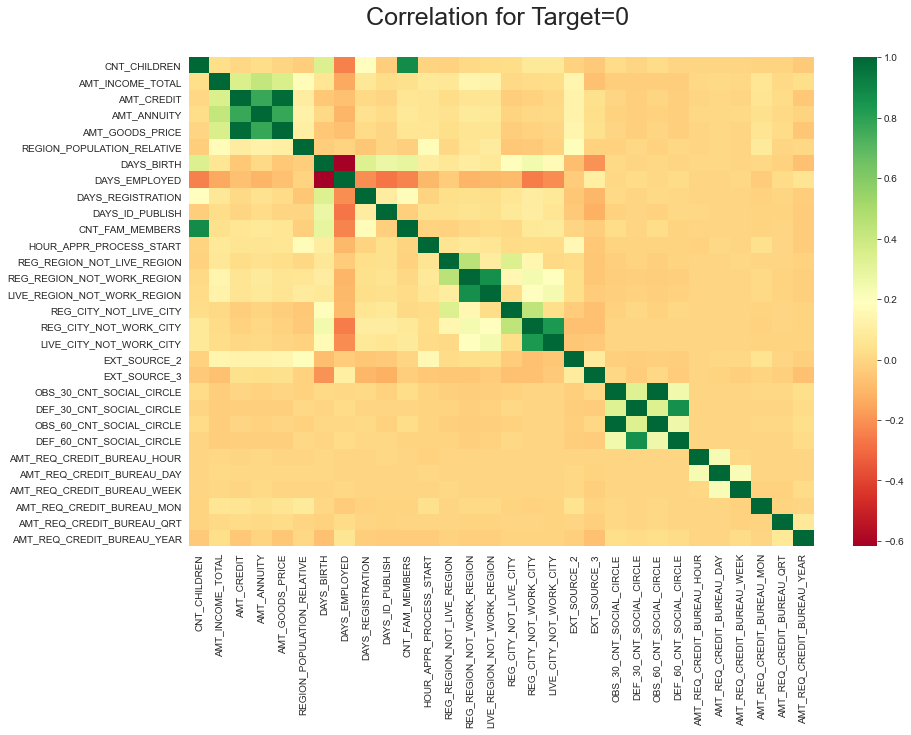

In [44]:
# Plotting the correlation for the Target_0.

plt.figure(figsize=[14,9])
sns.heatmap(target_0_corr, annot=False, cmap='RdYlGn')
plt.title('Correlation for Target=0 \n', fontsize=25)
plt.show()

##### Conclusions from the graph:

> 1. Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.
> 2. Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.
> 3. Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.
> 4. Less children client have in densely populated area.
> 5. Credit amount is higher to densely populated area.
> 6. The income is also higher in densely populated area.

In [45]:
# Calculating the correlation among the target_1 people

target_1_corr = target_1.iloc[0:, 2:].corr()
target_1_corr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.004796,-0.001675,0.031257,-0.008112,-0.031975,0.259109,-0.191942,0.149154,-0.032299,0.885484,-0.023899,-0.024322,-0.020793,-0.012073,-0.001174,0.046115,0.053515,-0.012260,-0.020268,0.025804,0.001448,0.025180,-0.005106,-0.000382,-0.013004,-0.011792,-0.012583,-0.018174,-0.035427
AMT_INCOME_TOTAL,0.004796,1.000000,0.038131,0.046421,0.037583,0.009135,0.003096,-0.014979,0.000158,-0.004215,0.006654,0.013775,0.007577,0.014531,0.013409,-0.002223,-0.003019,-0.001353,0.007154,-0.015110,-0.004709,-0.005186,-0.004616,-0.004866,0.000656,-0.000272,0.000018,0.004114,-0.001133,0.001752
AMT_CREDIT,-0.001675,0.038131,1.000000,0.752195,0.983103,0.069161,-0.135316,-0.000968,-0.025854,-0.052329,0.051224,0.031782,0.019540,0.033260,0.033554,-0.033034,-0.037720,-0.016509,0.120848,0.077698,0.019098,-0.025979,0.019487,-0.030880,-0.005981,0.003008,0.007650,0.055038,-0.017467,-0.035719
AMT_ANNUITY,0.031257,0.046421,0.752195,1.000000,0.752699,0.071690,-0.014303,-0.082552,0.034279,-0.016767,0.075711,0.031236,0.034807,0.066565,0.064109,-0.005745,0.001997,0.009902,0.116305,0.041415,0.004463,-0.022394,0.005500,-0.027495,0.014039,-0.000294,0.031242,0.053413,-0.010205,-0.013841
AMT_GOODS_PRICE,-0.008112,0.037583,0.983103,0.752699,1.000000,0.076049,-0.135810,0.003587,-0.025679,-0.056086,0.047388,0.044315,0.022392,0.036261,0.035484,-0.034115,-0.038916,-0.016685,0.131184,0.078754,0.019921,-0.021783,0.020385,-0.026179,-0.004496,0.004280,0.007980,0.058558,-0.016024,-0.037848
REGION_POPULATION_RELATIVE,-0.031975,0.009135,0.069161,0.071690,0.076049,1.000000,-0.048190,0.015103,-0.056222,-0.015537,-0.030163,0.142744,-0.022129,0.022256,0.046059,-0.059718,-0.052369,-0.020428,0.169751,-0.009810,0.006224,0.025865,0.006793,0.018231,-0.001238,-0.005483,0.002904,0.071329,-0.007299,0.000602
DAYS_BIRTH,0.259109,0.003096,-0.135316,-0.014303,-0.135810,-0.048190,1.000000,-0.575097,0.289114,0.252863,0.203267,0.062172,0.054654,0.069564,0.045517,0.161858,0.215192,0.123623,-0.108662,-0.171621,-0.005164,0.004946,-0.005391,0.004001,0.014654,-0.007248,-0.005537,-0.005713,-0.017214,-0.084192
DAYS_EMPLOYED,-0.191942,-0.014979,-0.000968,-0.082552,0.003587,0.015103,-0.575097,1.000000,-0.188929,-0.226470,-0.186561,-0.059997,-0.033331,-0.088954,-0.077201,-0.084961,-0.242019,-0.196453,-0.001479,0.093842,-0.008866,0.003205,-0.009151,0.005399,-0.007632,0.021363,0.014720,-0.025738,0.014982,0.035150
DAYS_REGISTRATION,0.149154,0.000158,-0.025854,0.034279,-0.025679,-0.056222,0.289114,-0.188929,1.000000,0.096833,0.145828,-0.032518,0.020403,0.021183,0.015547,0.048585,0.088427,0.062636,-0.069996,-0.086099,0.014104,0.010299,0.014522,0.009157,-0.004984,-0.008367,0.003130,0.004876,-0.012457,-0.013321
DAYS_ID_PUBLISH,-0.032299,-0.004215,-0.052329,-0.016767,-0.056086,-0.015537,0.252863,-0.226470,0.096833,1.000000,-0.031785,0.021661,0.032746,0.032932,0.020241,0.067427,0.070224,0.031431,-0.059814,-0.128268,-0.019968,0.007602,-0.019594,0.004946,0.003837,-0.012654,0.003047,-0.014166,0.007995,-0.041730


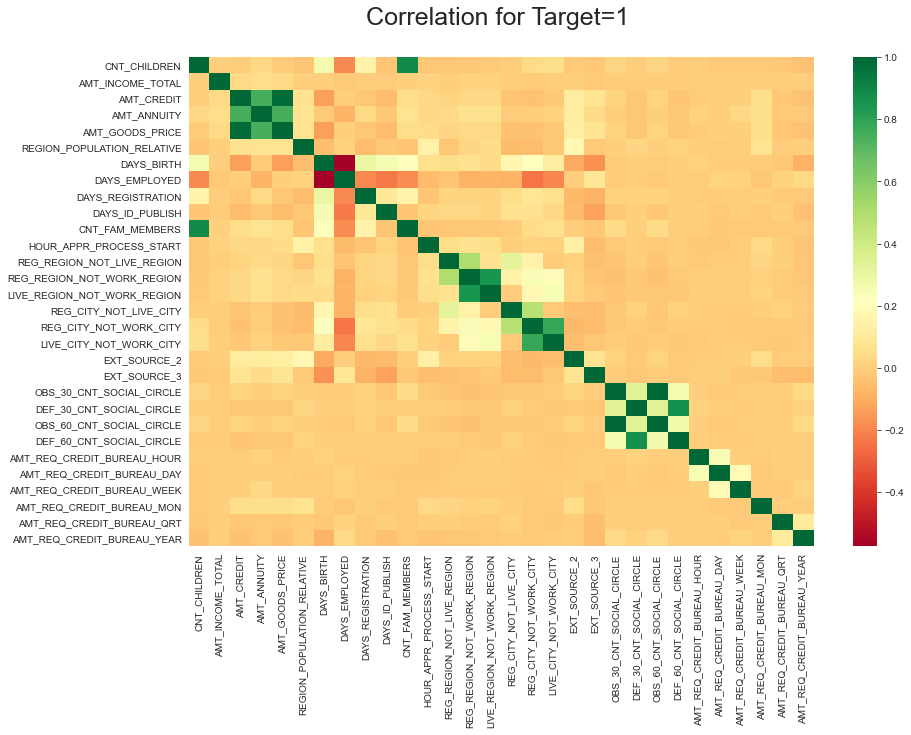

In [46]:
# Plotting the correlation for the Target_0.

plt.figure(figsize=[14,9])
sns.heatmap(target_1_corr, annot=False, cmap='RdYlGn')
plt.title('Correlation for Target=1 \n', fontsize=25)
plt.show()

##### Conclusions from the graph:

> Same like the target=0 heatmap above, adding some other points from this heatmap.
> 1. The client's permanent address does not match contact address are having less children and vice-versa
> 2. The client's permanent address does not match work address are having less children and vice-versa

## Finding the top 10 correlations for Target 0 and Target 1

In [47]:
# Converting the negative values to postive values and sorting the value

corr_0 = target_0_corr.abs().unstack().sort_values(kind='quicksort').dropna()
corr_0 = corr_0[corr_0 != 1.0]
corr_0

DAYS_REGISTRATION           AMT_REQ_CREDIT_BUREAU_DAY     0.000035
AMT_REQ_CREDIT_BUREAU_DAY   DAYS_REGISTRATION             0.000035
REG_REGION_NOT_WORK_REGION  AMT_REQ_CREDIT_BUREAU_WEEK    0.000125
AMT_REQ_CREDIT_BUREAU_WEEK  REG_REGION_NOT_WORK_REGION    0.000125
LIVE_CITY_NOT_WORK_CITY     AMT_REQ_CREDIT_BUREAU_HOUR    0.000149
                                                            ...   
CNT_CHILDREN                CNT_FAM_MEMBERS               0.878571
AMT_CREDIT                  AMT_GOODS_PRICE               0.987250
AMT_GOODS_PRICE             AMT_CREDIT                    0.987250
OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE      0.998508
OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE      0.998508
Length: 870, dtype: float64

In [48]:
# Top 10 correlation for the Target = 0,

corr_0.tail(10)

DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.859332
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.859332
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.861861
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861861
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.878571
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.878571
AMT_CREDIT                   AMT_GOODS_PRICE                0.987250
AMT_GOODS_PRICE              AMT_CREDIT                     0.987250
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998508
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998508
dtype: float64

In [49]:
# Converting the negative values to postive values and sorting the value

corr_1 = target_1_corr.abs().unstack().sort_values(kind='quicksort').dropna()
corr_1 = corr_1[corr_1 != 1.0]
corr_1

LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY         0.000011
REG_CITY_NOT_LIVE_CITY       LIVE_REGION_NOT_WORK_REGION    0.000011
AMT_INCOME_TOTAL             AMT_REQ_CREDIT_BUREAU_WEEK     0.000018
AMT_REQ_CREDIT_BUREAU_WEEK   AMT_INCOME_TOTAL               0.000018
AMT_INCOME_TOTAL             DAYS_REGISTRATION              0.000158
                                                              ...   
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.885484
AMT_CREDIT                   AMT_GOODS_PRICE                0.983103
AMT_GOODS_PRICE              AMT_CREDIT                     0.983103
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998269
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998269
Length: 870, dtype: float64

In [50]:
# Top 10 correlation for the Target = 1,

corr_1.tail(10)

REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.847885
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.847885
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.868994
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.868994
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.885484
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.885484
AMT_CREDIT                   AMT_GOODS_PRICE                0.983103
AMT_GOODS_PRICE              AMT_CREDIT                     0.983103
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998269
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998269
dtype: float64

### 11.Bivariate Analysis of the numerical columns

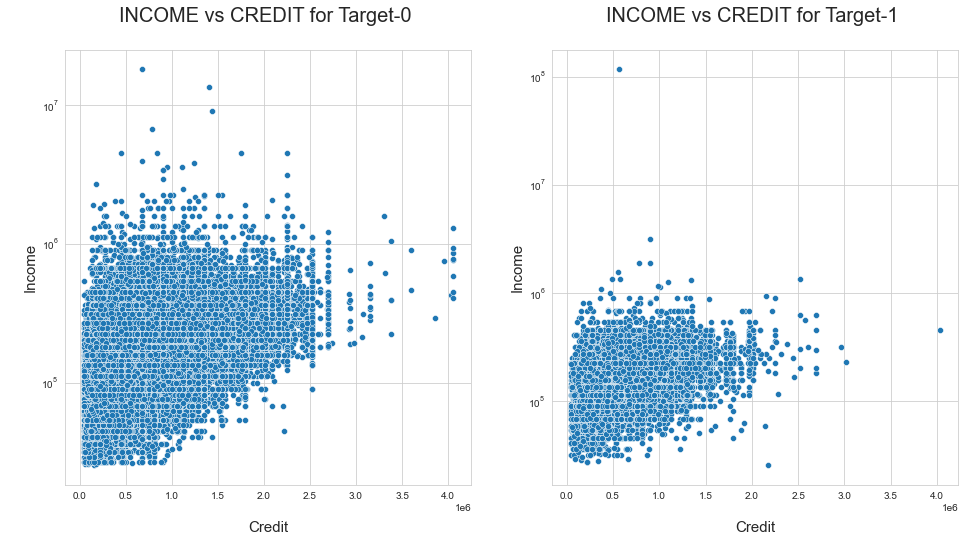

In [51]:
# Plotting scatterplot to find any correlations and to check the trends in the dataset, in logs,

plt.figure(figsize=[16,8])

plt.subplot(1,2,1)
sns.scatterplot(target_0.AMT_CREDIT, target_0.AMT_INCOME_TOTAL)
plt.title('INCOME vs CREDIT for Target-0 \n', fontsize=20)
plt.yscale('log')
plt.xlabel('\nCredit', fontsize=15)
plt.ylabel('\nIncome', fontsize=15)

plt.subplot(1,2,2)
sns.scatterplot(target_1.AMT_CREDIT, target_1.AMT_INCOME_TOTAL)
plt.title('INCOME vs CREDIT for Target-1 \n', fontsize=20)
plt.yscale('log')
plt.xlabel('\nCredit', fontsize=15)
plt.ylabel('\nIncome', fontsize=15)

plt.show()

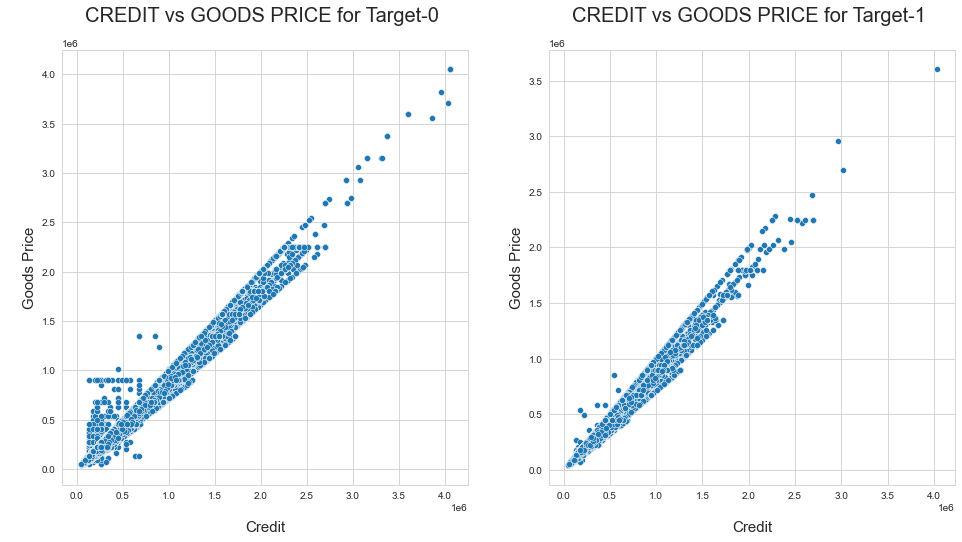

In [52]:
# Plotting scatterplot to find any correlations and to check the trends in the dataset.


plt.figure(figsize=[16,8])

plt.subplot(1,2,1)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=target_0)
plt.title('CREDIT vs GOODS PRICE for Target-0 \n', fontsize=20)
plt.xlabel('\nCredit', fontsize=15)
plt.ylabel('\nGoods Price', fontsize=15)

plt.subplot(1,2,2)
sns.scatterplot(x='AMT_CREDIT',y='AMT_GOODS_PRICE',data=target_1)
plt.title('CREDIT vs GOODS PRICE for Target-1 \n', fontsize=20)
plt.xlabel('\nCredit', fontsize=15)
plt.ylabel('\nGoods Price', fontsize=15)

plt.show()

##### Conclusions from the graph:

> With the scatter plot,we can determine that AMT CREDIT and AMT GOODS PRICE are highly correlated,which means if increase in goods price,the credit increased directly and vice versa.

## Finding Outliers

### Univariate Analysis

#### For Target=0 

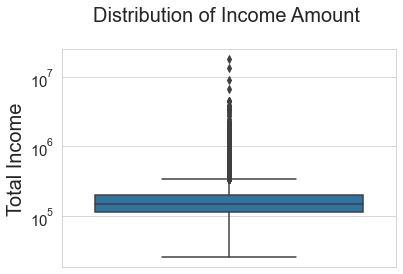

In [53]:
# Distribution of Income Amount,

sns.set_style('whitegrid')

sns.boxplot(data=target_0, y='AMT_INCOME_TOTAL')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Income', fontsize=20)
plt.title('Distribution of Income Amount \n', fontsize=20)

plt.show()

##### Conclusions from the graph:

> 1. There seems to be an equal distribution of the Income amount of the clients.
> 2. Also some of the outliers present in the dataset.

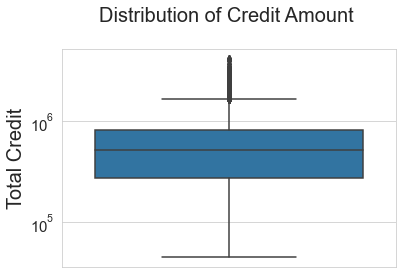

In [54]:
# Distribution of Credit Amount,

sns.set_style('whitegrid')

sns.boxplot(data=target_0, y='AMT_CREDIT')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Credit', fontsize=20)
plt.title('Distribution of Credit Amount \n', fontsize=20)

plt.show()

##### Conclusions from the graph:

> 1. The first quartile is bigger than the third quartile, that means most of the client credit lies in the first quartile.
> 2. There seems some outliers in the Credit boxplot.

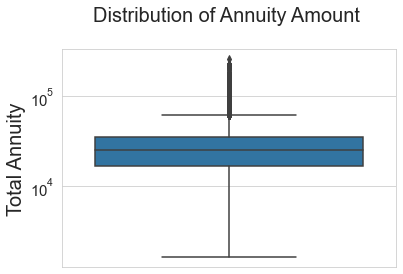

In [55]:
# Distribution of Annuity,

sns.set_style('whitegrid')

sns.boxplot(data=target_0, y='AMT_ANNUITY')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Annuity', fontsize=20)
plt.title('Distribution of Annuity Amount \n', fontsize=20)

plt.show()

##### Conclusions from the graph:

> 1. The first quartile is bigger than the third quartile.
> 2. There seems some outliers in the Anuuity boxplot.

#### For Target=1

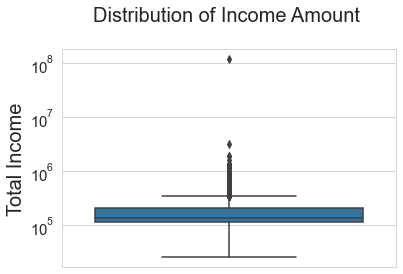

In [56]:
# Distribution of Income Amount,

sns.set_style('whitegrid')

sns.boxplot(data=target_1, y='AMT_INCOME_TOTAL')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Income', fontsize=20)
plt.title('Distribution of Income Amount \n', fontsize=20)

plt.show()

##### Conclusions from the graph:

> 1. There seems a significant outlier in the Income dataset.
> 2. Most of the income of the client lies in the third quartile.

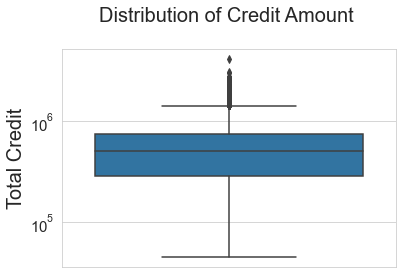

In [57]:
# Distribution of Credit Amount,

sns.set_style('whitegrid')

sns.boxplot(data=target_1, y='AMT_CREDIT')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Credit', fontsize=20)
plt.title('Distribution of Credit Amount \n', fontsize=20)

plt.show()

##### Conclusions from the graph:

> 1. The first quartile is bigger than the third quartile, that means most of the client credit lies in the first quartile. 
> 2. There seems some outliers in the Credit boxplot.

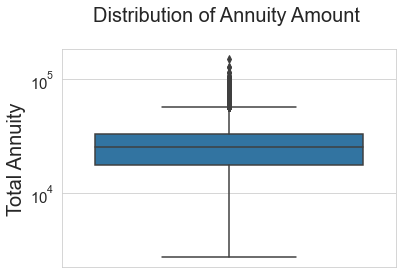

In [58]:
# Distribution of Annuity,

sns.set_style('whitegrid')

sns.boxplot(data=target_1, y='AMT_ANNUITY')
plt.yscale('log')
plt.yticks(fontsize=15)
plt.ylabel('Total Annuity', fontsize=20)
plt.title('Distribution of Annuity Amount \n', fontsize=20)

plt.show()

##### Conclusions from the graph:

> 1. The first quartile is bigger than the third quartile.
> 2. There seems some outliers in the Anuuity boxplot.

### Multivariate Analysis

#### Target = 0

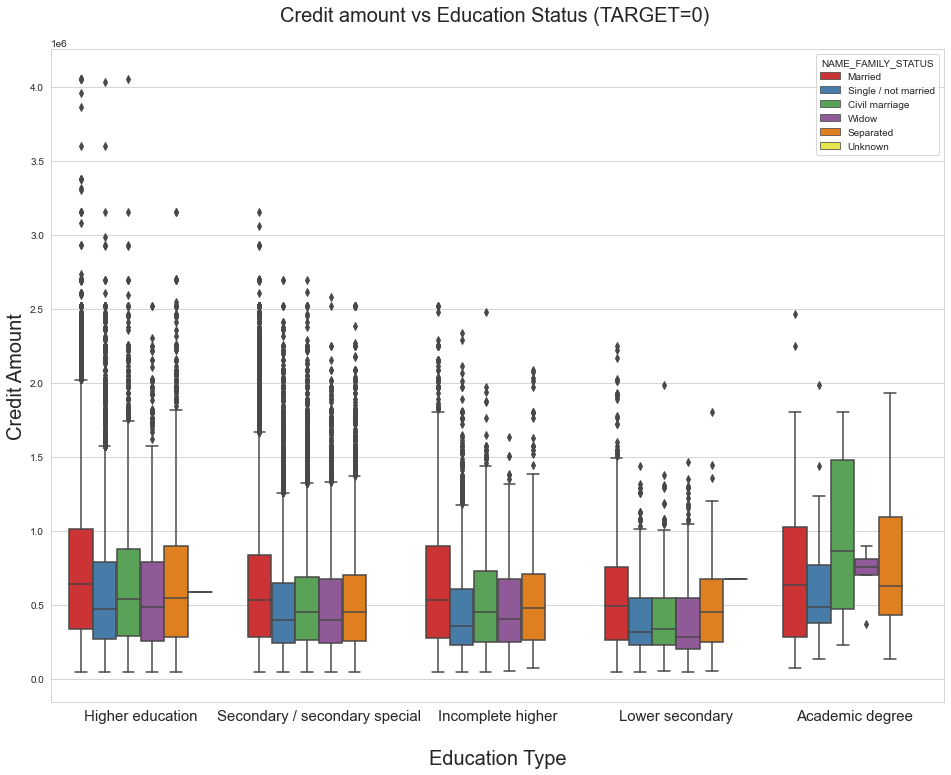

In [59]:
# Box Plotting for the Target = 0, Credit Amount

plt.figure(figsize=[16,12])

sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v', palette='Set1')

plt.xticks(rotation=0,fontsize=15)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('Credit Amount', fontsize=20)
plt.title('Credit amount vs Education Status (TARGET=0) \n', fontsize=20)
plt.show()

##### Conclusions from the graph:

> From the above box plot we can conclude that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Also, higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers. Civil marriage for Academic degree is having most of the credits in the third quartile.


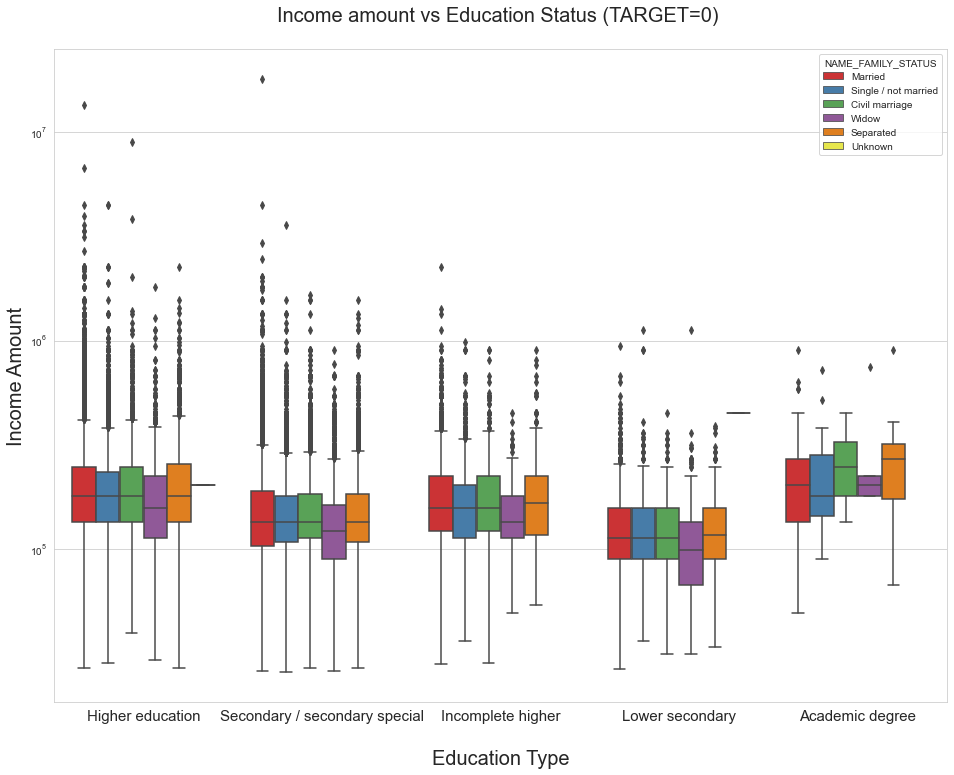

In [60]:
# Box Plotting for the Target = 0, Income Amount

plt.figure(figsize=[16,12])

sns.boxplot(data =target_0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v', palette='Set1')

plt.xticks(fontsize=15)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('Income Amount', fontsize=20)
plt.yscale('log')
plt.title('Income amount vs Education Status (TARGET=0) \n', fontsize=20)

plt.show()

##### Conclusions from the graph:

> From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers. Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary of civil marriage family status are have less income amount than others.


#### Target = 1

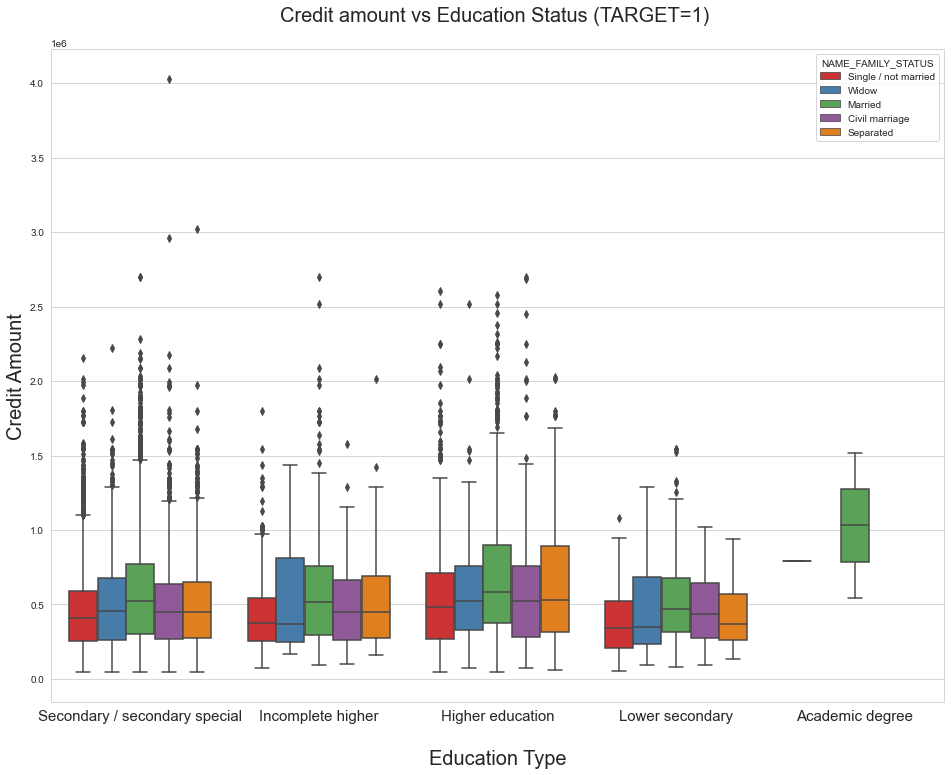

In [61]:
# Box Plotting for the Target = 1, Credit Amount

plt.figure(figsize=[16,12])

sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS', orient='v', palette='Set1')

plt.xticks(fontsize=15)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('Credit Amount', fontsize=20)
plt.title('Credit amount vs Education Status (TARGET=1) \n', fontsize=20)
plt.show()

##### Conclusions from the graph:

> From the above box plot we can say that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Most of the outliers are from Education type 'Higher education' and 'Secondary'. Civil marriage for Academic degree is having most of the credits in the third quartile.

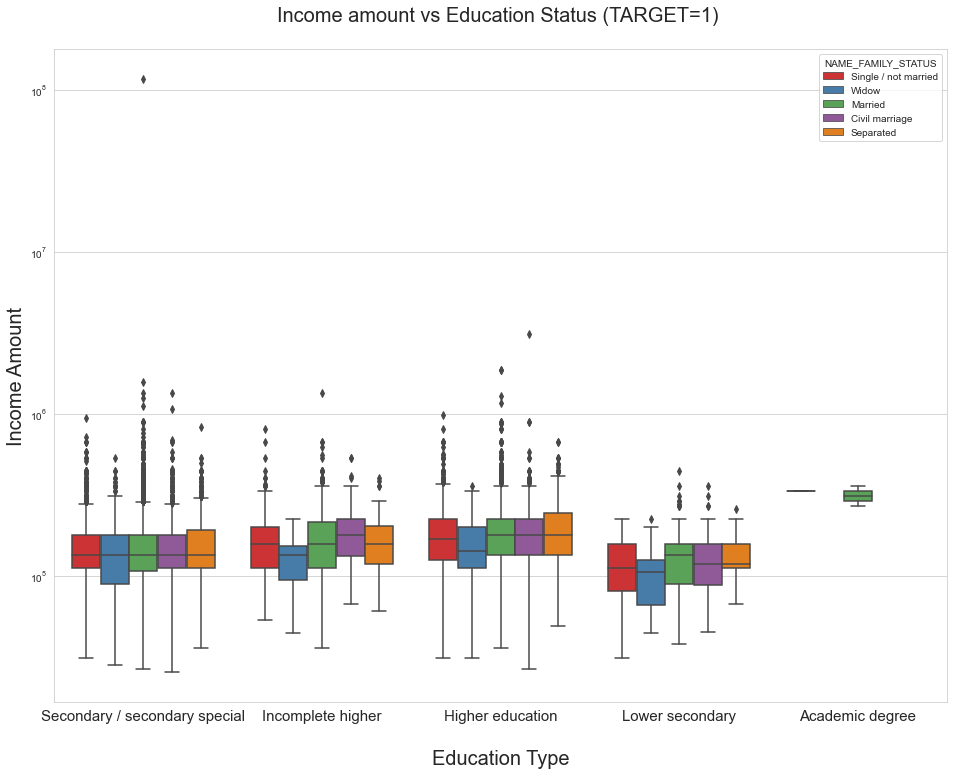

In [62]:
# Box Plotting for the Target = 1, Income Amount

plt.figure(figsize=[16,12])

sns.boxplot(data =target_1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v', palette='Set1')

plt.xticks(fontsize=15)
plt.xlabel('\nEducation Type', fontsize=20)
plt.ylabel('Income Amount', fontsize=20)
plt.yscale('log')
plt.title('Income amount vs Education Status (TARGET=1) \n', fontsize=20)
plt.show()

##### Conclusions from the graph:

> From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary are have less income amount than others.

## 12.Work on previous_application dataset

In [63]:
# Removing the 'XNA' and 'XAP' column values from the column,

P_A = P_A.drop(P_A[P_A.NAME_CASH_LOAN_PURPOSE=='XNA'].index)
P_A = P_A.drop(P_A[P_A.NAME_CASH_LOAN_PURPOSE=='XAP'].index)

In [64]:
# Rechecking the NAME_CASH_LOAN_PURPOSE for the values.

P_A.NAME_CASH_LOAN_PURPOSE.value_counts()

Repairs                             23765
Other                               15608
Urgent needs                         8412
Buying a used car                    2888
Building a house or an annex         2693
Everyday expenses                    2416
Medicine                             2174
Payments on other loans              1931
Education                            1573
Journey                              1239
Purchase of electronic equipment     1061
Buying a new car                     1012
Wedding / gift / holiday              962
Buying a home                         865
Car repairs                           797
Furniture                             749
Buying a holiday home / land          533
Business development                  426
Gasification / water supply           300
Buying a garage                       136
Hobby                                  55
Money for a third person               25
Refusal to name the goal               15
Name: NAME_CASH_LOAN_PURPOSE, dtyp

## 13.Merging the two datasets, i.e. application_dataset and previous_application

In [65]:
# Merging of the two datasets,

loan_merg = pd.merge(left = A_D, right = P_A, how = 'inner', on = 'SK_ID_CURR', suffixes = '_x')
loan_merg.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,AMT_GOODS_PRICE_,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_ANNUITYx,AMT_APPLICATION,AMT_CREDITx,AMT_GOODS_PRICEx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,180000.0,Unaccompanied,Working,Higher education,Single / not married,With parents,0.030755,-10341,-1010,-4799,-3015,1.0,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.502779,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"75000,100000",150000-200000,1390369,Cash loans,22430.430,94500.0,109971.0,94500.0,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,6.0,high,Cash Street: high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266,-3787,2.0,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.410103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,275000-300000,650000-700000,1344613,Cash loans,33238.800,1260000.0,1260000.0,1260000.0,WEDNESDAY,14,Y,1,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_action,Cash Street: low
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,679500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,-11694,-2060,-3557,-3557,3.0,THURSDAY,10,0,0,0,1,1,0,Self-employed,0.321745,0.411849,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,350000-375000,700000-750000,1077565,Cash loans,52513.515,1350000.0,1487214.0,1350000.0,MONDAY,14,Y,1,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,42.0,low_normal,Cash Street: low
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-8236,-4292,2.0,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.738053,0.605836,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,175000-200000,500000-550000,1223113,Cash loans,28390.635,337500.0,407911.5,337500.0,MONDAY,13,Y,1,Repairs,Approved,-539,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,low_normal,Cash Street: low
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,540000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,-16126,-1761,-8236,-4292,2.0,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,0.738053,0.605836,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,175000-200000,500000-550000,1529558,Cash loans,29053.215,450000.0,555723.0,450000.0,MONDAY,15,Y,1,Repairs,Refused,-449,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,low_normal,Cash Street: low


In [66]:
# Renaming the columns in the loan_merg datasets,

loan_merg = loan_merg.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [67]:
# Removing the unwanted columns from the dataset for the ease of analysis

loan_merg.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

## 14.Performing the Univariate analysis

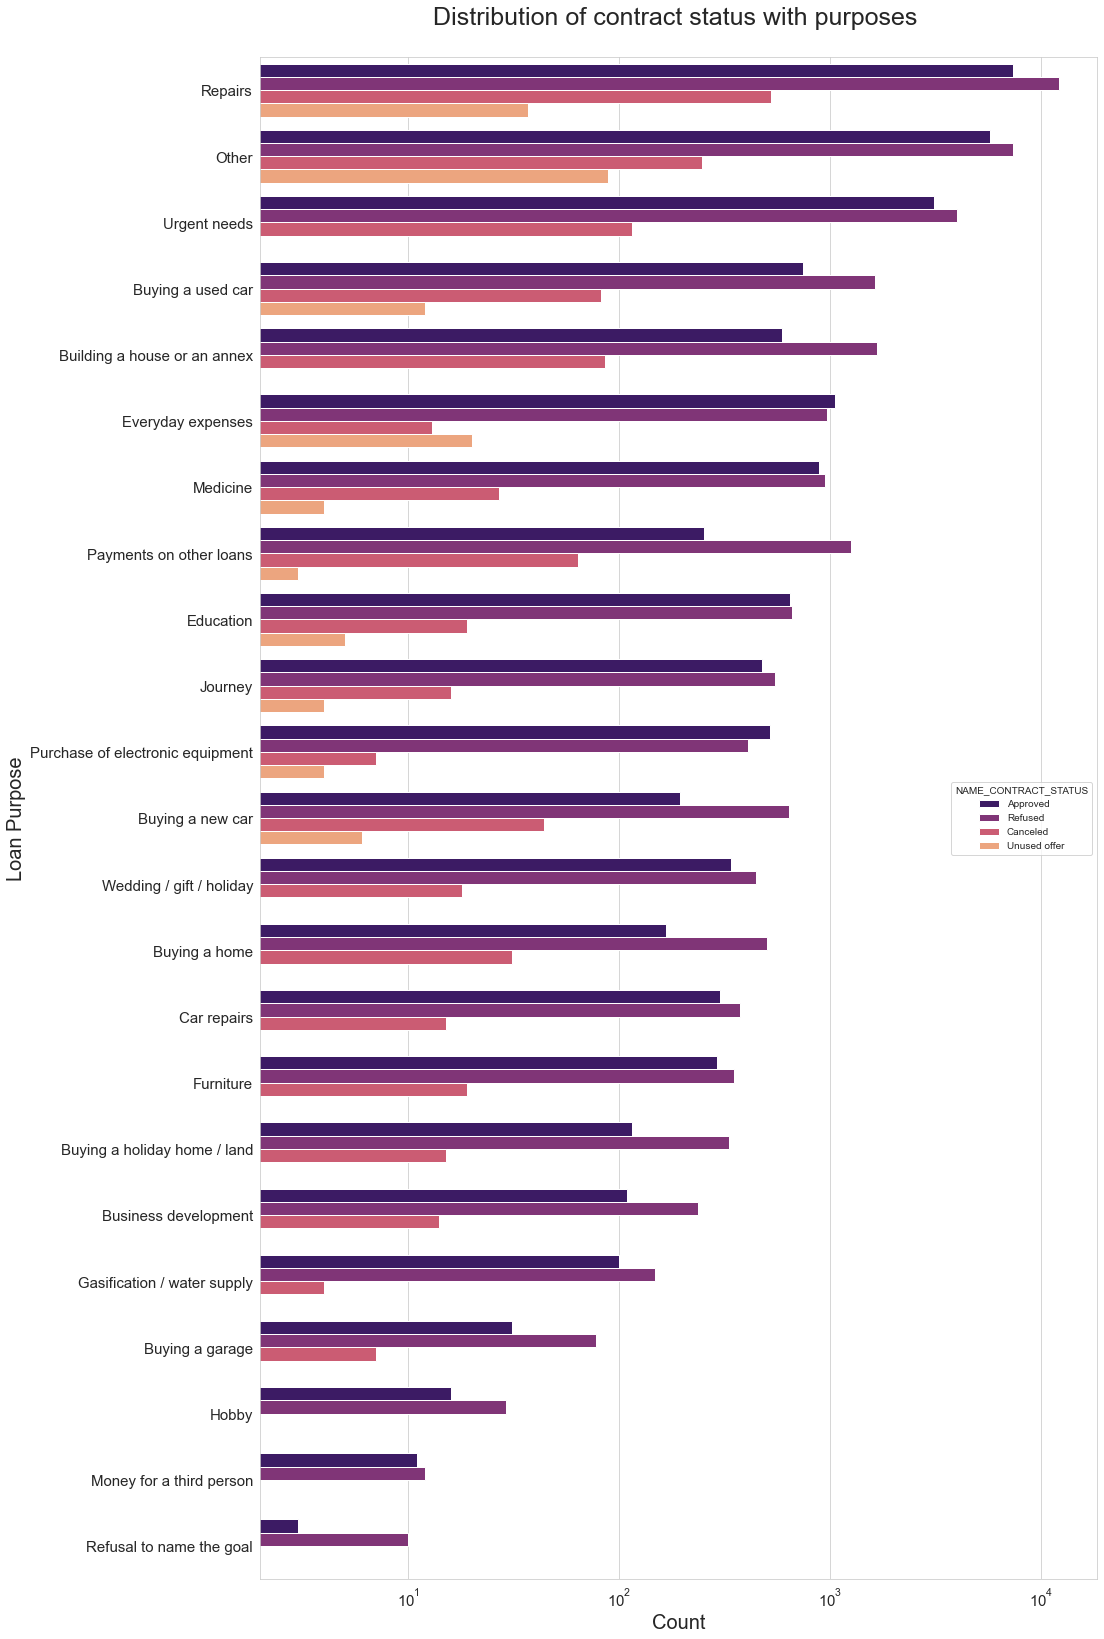

In [68]:
# Plotting for the Contract Status,

plt.figure(figsize=[15,28])

sns.countplot(data = loan_merg, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=loan_merg['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')

plt.title('Distribution of contract status with purposes \n', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Loan Purpose', fontsize=20)
plt.xscale('log')

plt.show()

##### Conclusions from the graph:

> 1. Most rejection of loans came from purpose 'Repairs'.
> 2. For education purposes we have equal number of approves and rejection.
> 3. Paying other loans and buying a new car is having significant higher rejection than approves.

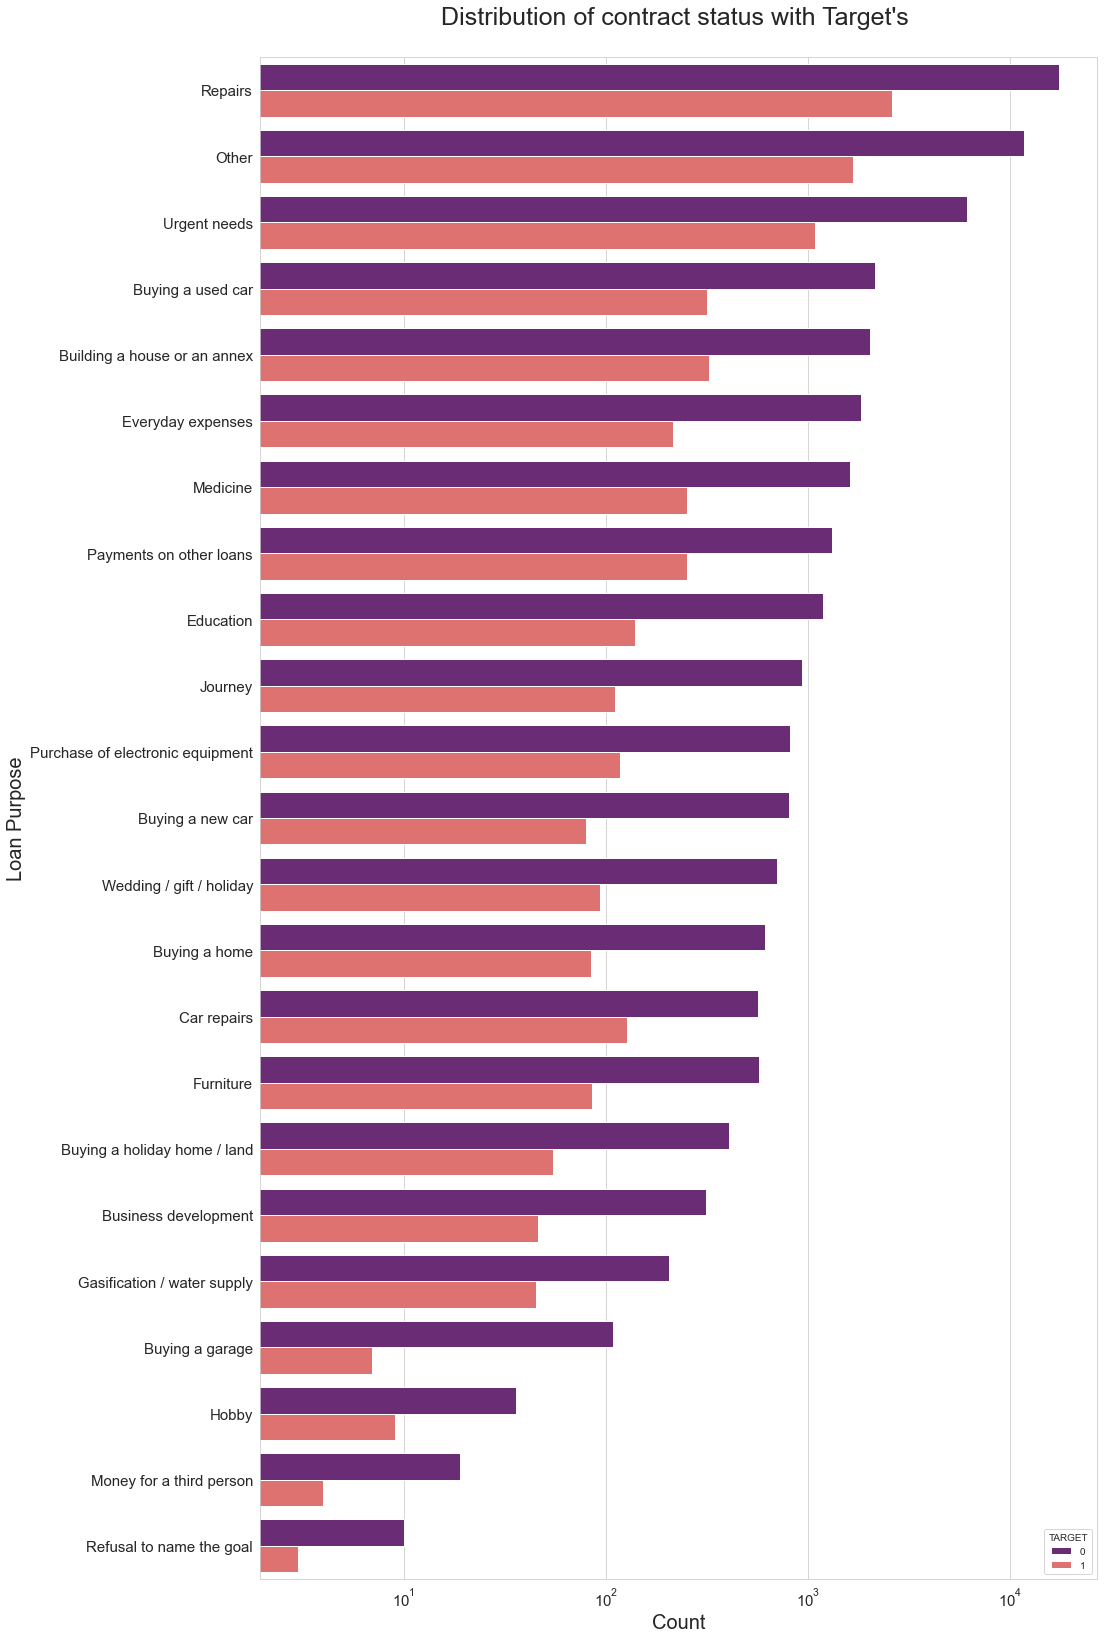

In [69]:
# Plotting for the Contract Status,

plt.figure(figsize=[15,28])

sns.countplot(data = loan_merg, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=loan_merg['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma')

plt.title('Distribution of contract status with Target\'s \n', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Loan Purpose', fontsize=20)
plt.xscale('log')

plt.show()

##### Conclusions from the graph:

> 1. Loan purposes with 'Repairs' are facing more difficulites in payment on time.
> 2. There are few places where loan payment is significant higher than facing difficulties. They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education' Hence we can focus on these purposes for which the client is having for minimal payment difficulties.


## 15.Performing the bivariate analysis

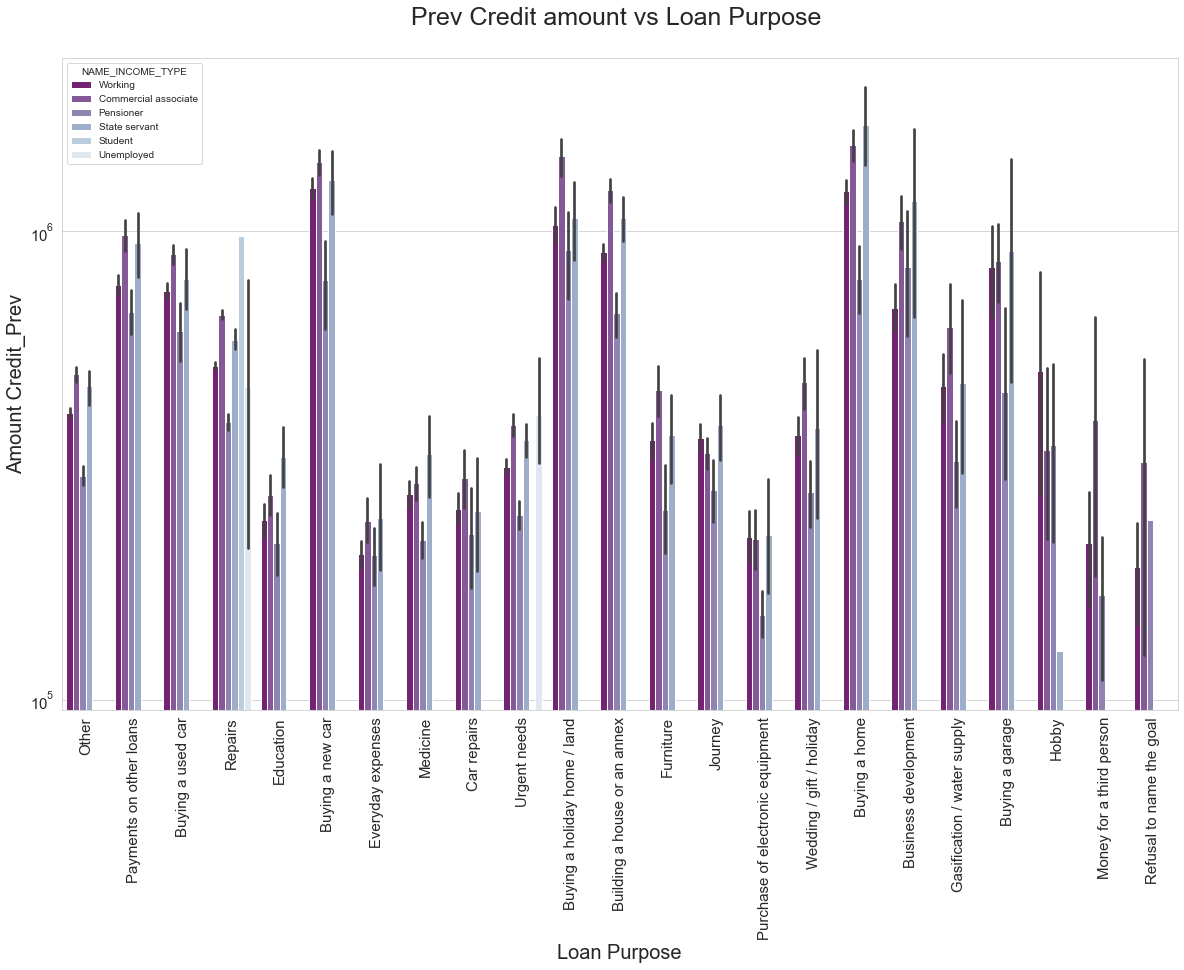

In [70]:
# Plotting for Credit amount in logarithmic scale

plt.figure(figsize=(20,12))

sns.barplot(data = loan_merg, x='NAME_CASH_LOAN_PURPOSE', hue='NAME_INCOME_TYPE', y='AMT_CREDIT_PREV', orient='v', palette='BuPu_r')
plt.xticks(rotation=90)
plt.ylabel('Amount Credit_Prev', fontsize=20)
plt.xlabel('Loan Purpose', fontsize=20)
plt.yscale('log')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Prev Credit amount vs Loan Purpose \n', fontsize=25)

plt.show()

##### Conclusions from the graph:

> 1. The credit amount of Loan purposes like 'Buying a home','Buying a land','Buying a new car' and'Building a house' is higher.
> 2. Income type of state servants have a significant amount of credit applied
> 3. Money for third person or a Hobby is having less credits applied for.


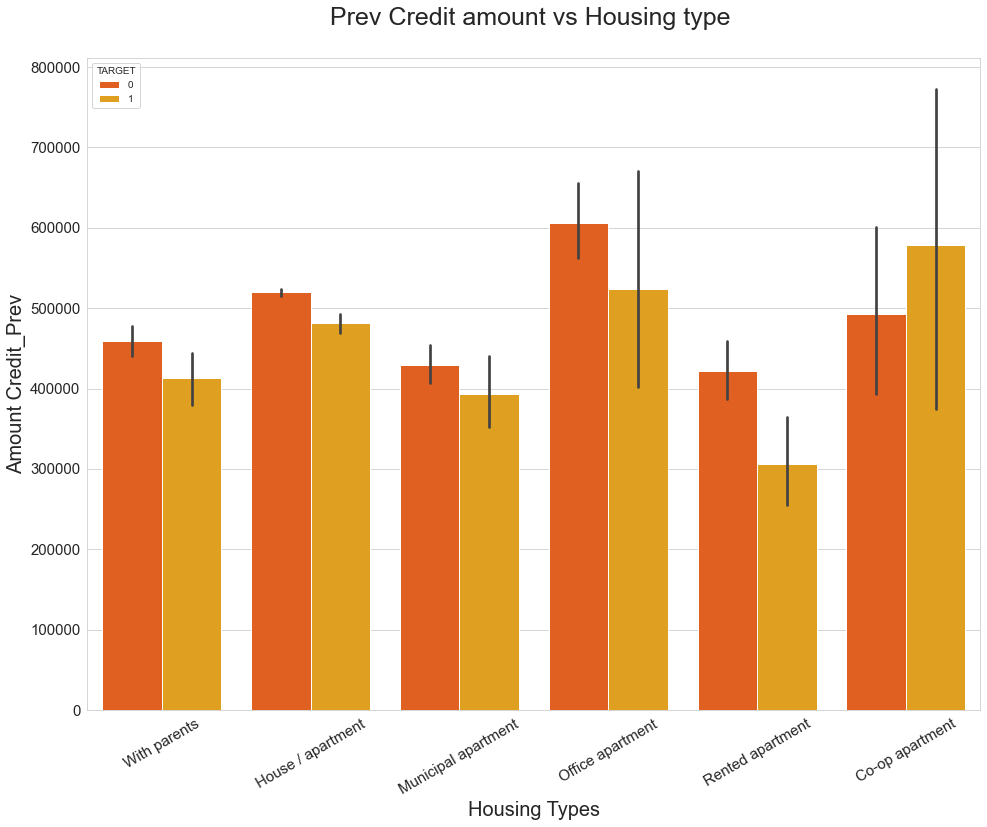

In [71]:
# Plotting for Credit amount prev vs Housing type,

plt.figure(figsize=(16,12))
plt.xticks(rotation=30)
sns.barplot(data =loan_merg, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE', palette='autumn')
plt.title('Prev Credit amount vs Housing type \n', fontsize=25)
plt.ylabel('Amount Credit_Prev', fontsize=20)
plt.xlabel('Housing Types', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

##### Conclusions from the graph:

> Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target=1. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

## Conclusions of this loan EDA Analysis:

> Banks should approve loans more for Office apartment, Co-Op apartment housing type as there are less payment difficulties.

> Banks should provide loans to ‘Repairs’ & ‘Others’ purposes.

> Banks should provide loans to the ‘Business Entity  Type-3’ and ‘Self-Employed’ persons.

> ‘Working’ people especially female employers are the best to target for the loans.